> ###  ***Submitted by: Malaika Ahmed***

# ***🔴 Task 26: Classification Algorithms using scikit-learn***

 data.


Classification algorithms in scikit-learn are used to categorize data into predefined classes. Some common ones include:

1. ***Logistic Regression***: Models the probability of a binary outcome using the logistic function.
2. ***k-Nearest Neighbors (k-NN)*** : Classifies data based on the majority class of its nearest neighbors.
3. ***Support Vector Machines (SVM)***: Finds the optimal hyperplane that separates classes with the maximum margin.
4. ***Decision Trees***: Splits data into subsets based on feature values to make decisions.
5. ***Random Forests***: An ensemble of decision trees that improves classification accuracy by averaging multiple trees.
6. ***Gradient Boosting:*** Builds models sequentially, each correcting errors of the previous one to improve performance.
7. ***Naive Bayes:*** Applies Bayes' theorem with an assumption of feature independence to classify data.


***

 # <span style='color:Red'>  ***1. k-Nearest Neighbors (k-NN)*** </span>
K-Nearest Neighbors operates by checking the distance from some test example to the known values of some training example. The group of data points/class that would give the smallest distance between the training points and the testing point is the class that is selected.


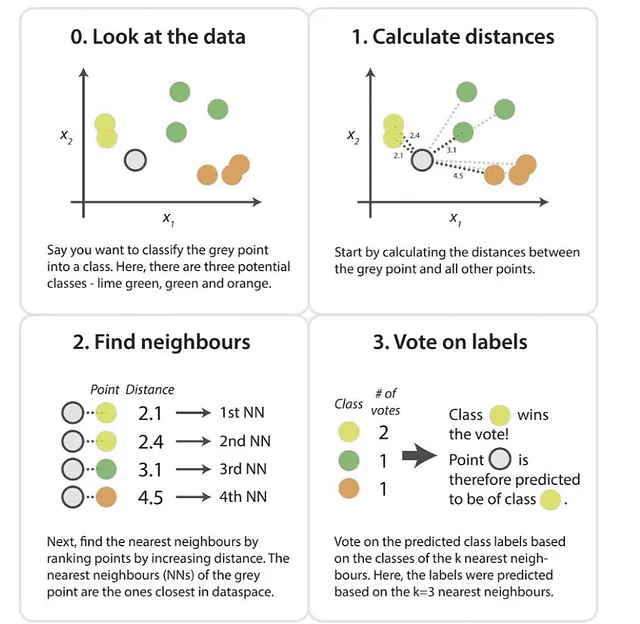

***

## ***Why do we need a K-NN Algorithm?***
Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem,we need a K-NN algorithm.
> #### ***With the help of K-NN, we can easily identify the category or class of a particular dataset***

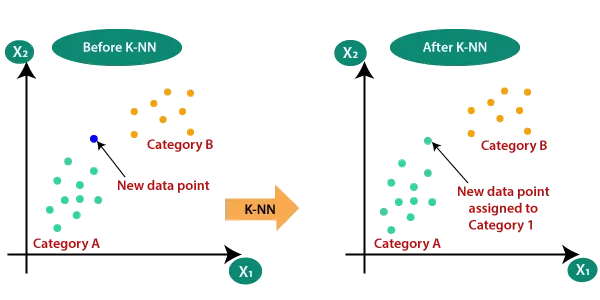
 Suppose, we have an image of a creature that looks similar to a cat and dog, but we want to know whether it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.


 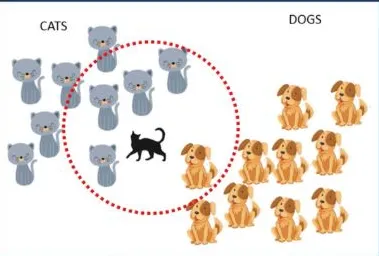


***

## ***How does K-NN work?***

The K-NN working can be explained on the basis of the below algorithm:

- Step-1: Select the number K of the neighbors.
- Step-2: Calculate the Euclidean distance of K number of neighbors.
- Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
- Step-4: Among these k neighbors, count the number of the data points in each category.
- Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
- Step-6: Our model is ready.

Suppose we have a new data point and we need to put it in the required category. Consider the below image:
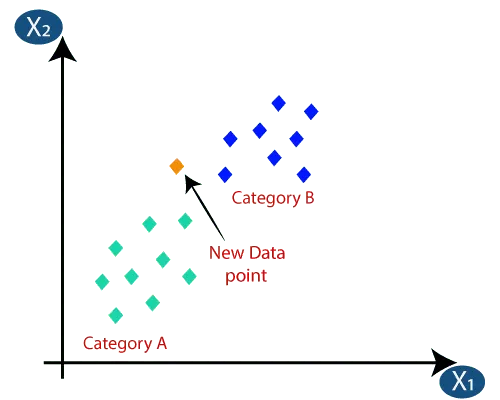

- Firstly, we will choose the number of neighbors, so we will choose the k=5.- 
Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as

  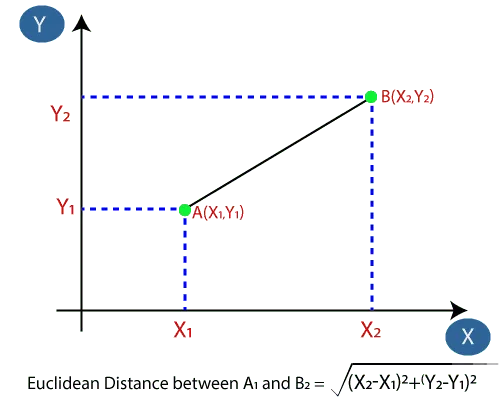

- By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:

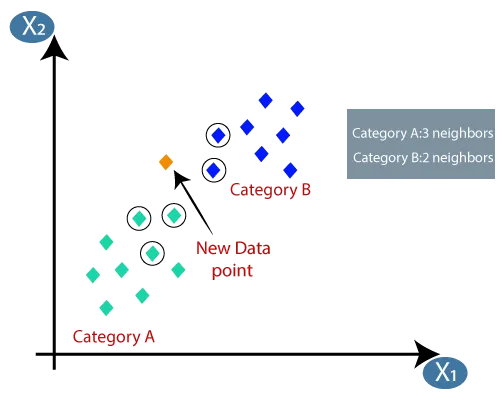
- As we can see the 3 nearest neighbors are from category A, hence this new data point must belong to category A.:

***

## ***Real-World Applications of KNN***
KNN finds applications in various fields, including:

- Recommendation Systems: Recommending products or services based on the preferences of similar users.
- Image Recognition: Classifying images based on similarity to known images.
- Medical Diagnosis: Predicting diseases based on symptoms and patient data.
- Anomaly Detection: Identifying abnormal behavior or outliers in datasets.

***

 # <span style='color:Green'>  ***Creating KNN Classification Model*** </span>


 ### <span style='color:Blue'>  ***Importing Libraries*** </span>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

 ### <span style='color:Blue'>  ***Importing DataSet*** </span>


In [3]:
df=pd.read_csv("iphone_purchase_records.csv")

In [4]:
df.sample(5)

,Gender,Age,Salary,Purchase Iphone
266,Male,40,75000,0
52,Female,29,83000,0
44,Female,28,84000,0
268,Female,47,144000,1
147,Female,41,30000,0


 ### <span style='color:Blue'>  ***Cleaning DataSet*** </span>


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

20

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape


(380, 4)

 ### <span style='color:Blue'>  ***Splitting data into Training and Testing*** </span>


In [10]:
x=df[['Age','Salary']] 
y=df['Purchase Iphone']


In [11]:
x.head()

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchase Iphone, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)


 ### <span style='color:Blue'>  ***Scaling data*** </span>


In [14]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 ### <span style='color:Blue'>  ***Creating an Object of KNN Classifier*** </span>


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)


 ### <span style='color:Blue'>  ***Fitting/Training the data*** </span>


In [16]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

 ### <span style='color:Blue'>  ***Predicting Accuracy Score*** </span>


In [17]:

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9078947368421053

***

## ***Cross Validation for selecting Best K Value***

In [18]:
scores = []

for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuray Score')

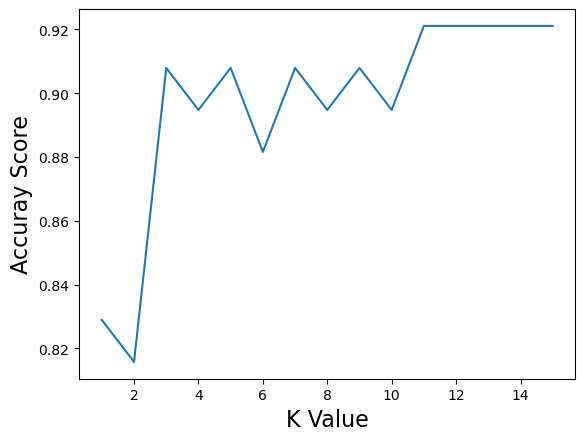

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)
plt.xlabel("K Value",fontsize=16)
plt.ylabel("Accuray Score",fontsize=16)

 ### From the graph we can see that best accuracy score occurs when k is arond 15

In [20]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9210526315789473

***

## ***Limitations Of KNN***

- KNN has some drawbacks and challenges, such as computational expense, slow speed, memory and storage issues for large datasets, sensitivity to the choice of k and the distance metric, and susceptibility to the curse of dimensionality. 
- It can be computationally expensive to store and search through the entire training dataset for each new observation.
- The performance and generalization of KNN can be affected by the choice of k and distance metric; a small k can cause overfitting and high variance, while a large k can lead to underfitting and high bias. As the number of features increases, KNN's performance decreases due to the curse of dimensionality; this  can be remedied by using feature selection, dimensionality reduction, or weighting techniques.
-  Additionally, KNN does not provide any explanation or confidence for its predictions, which limits its interpretability and utility for some applications.



***
***
***


 # <span style='color:Red'>  ***2. Support Vector Machines (SVM)*** </span>
Support Vector Machines (SVMs) are a type of supervised machine learning algorithm used for classification tasks. They are widely used in various fields, including pattern recognition, image analysis, and natural language processing.SVMs work by finding the optimal hyperplane that separates data points into different classes.

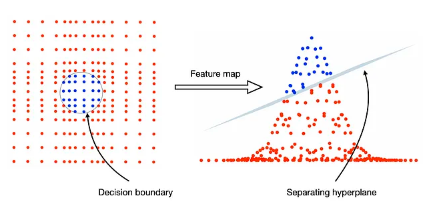

***

 # <span style='color:Blue'>  ***Key Terms*** </span>

### ***Hyperplane***
- A hyperplane is a decision boundary that separates data points into different classes in a high-dimensional space. In two-dimensional space, a hyperplane is simply a line that separates the data points into two classes. In three-dimensional space, a hyperplane is a plane that separates the data points into two classes. Similarly, in N-dimensional space, a hyperplane has (N-1)-dimensions.

- It can be used to make predictions on new data points by evaluating which side of the hyperplane they fall on. Data points on one side of the hyperplane are classified as belonging to one class, while data points on the other side of the hyperplane are classified as belonging to another class.
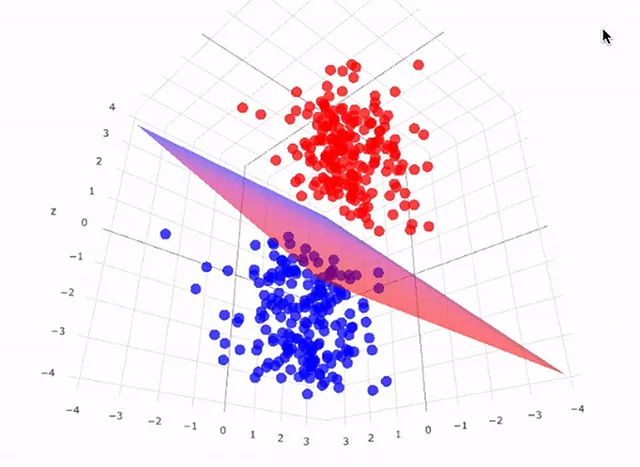


### ***Margin***
- A margin is the distance between the decision boundary (hyperplane) and the closest data points from each class. The goal of SVMs is to maximize this margin while minimizing classification errors. A larger margin indicates a greater degree of confidence in the classification, as it means that there is a larger gap between the decision boundary and the closest data points from each class.
-  The margin is a measure of how well-separated the classes are in feature space. SVMs are designed to find the hyperplane that maximizes this margin, which is why they are sometimes referred to as maximum-margin classifiers.

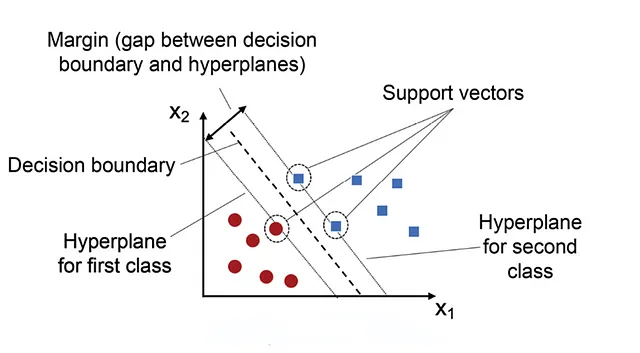

## ***Support Vectors***
- They are the data points that lie closest to the decision boundary (hyperplane) in a Support Vector Machine (SVM). These data points are important because they determine the position and orientation of the hyperplane, and thus have a significant impact on the classification accuracy of the SVM. In fact, SVMs are named after these support vectors because they “support” or define the decision boundary. 
- The support vectors are used to calculate the margin, which is the distance between the hyperplane and the closest data points from each class. The goal of SVMs is to maximize this margin while minimizing classification errors.

  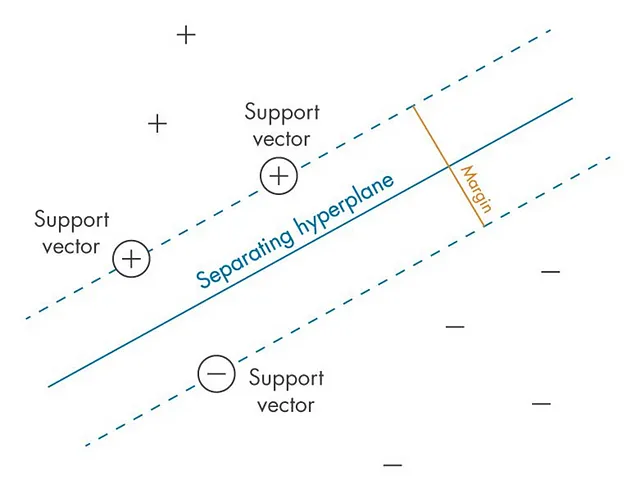

***

 # <span style='color:Blue'>  ***Uses and Applications of the SVM algorithm*** </span>

Some common uses and applications of the SVM algorithm include:

- Image Classification: SVMs are commonly used for image classification tasks, such as recognizing objects, animals, and scenes in images. They are effective in handling high-dimensional feature spaces and can work well with large datasets.
- Text Classification and Sentiment Analysis: SVMs are used in natural language processing tasks, such as text classification (e.g., spam detection, topic categorization) and sentiment analysis (determining the sentiment of text, like positive or negative).
- Bioinformatics: SVMs are applied in bioinformatics for tasks like protein structure prediction, gene classification, and disease diagnosis using gene expression data.
- Handwriting Recognition: SVMs have been used in handwriting recognition systems, where they learn to distinguish between different handwritten characters or digits.
- Face Detection and Recognition: SVMs are used in facial recognition systems for tasks like detecting faces in images, aligning facial features, and recognizing individuals.
- Anomaly Detection: SVMs are used to identify anomalies or outliers in datasets, which can be useful in fraud detection, network intrusion detection, and quality control.
- Remote Sensing and Satellite Image Analysis: SVMs can be employed to classify land cover types, monitor changes in environmental features, and analyze satellite images for agricultural, environmental, and urban planning purposes.
Gesture Recognition: SVMs can be used to recognize gestures in applications like sign language translation and human-computer interaction.




***

 # <span style='color:Green'>  ***Creating a SVM Classification Model*** </span>


In [21]:
X=df[['Salary']] 
y=df['Purchase Iphone']


In [51]:
 # "Support vector classifier"
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [53]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ***Calculating Accuracy Score Using SVM Classification Model***

In [54]:
y_pred_SVM = svc_linear.predict(X_test)

accuracy_score(y_test,y_pred_SVM)

0.8026315789473685

In [ ]:

cm = confusion_matrix(y_test, y_pred_SVM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for SVM Classifier \n Salary Vs Iphone Purchase Status',pad=20,fontsize=16)
plt.show()


### ***Insights from Confusion Matric of SVM Classifier***
- True Positives (TP) -> top-left (48): This represents the number of instances where the model correctly predicted the positive class (i.e., correctly predicted an iPhone purchase).

- True Negatives (TN)-> Bottom-Right (13): This represents the number of instances where the model correctly predicted the negative class (i.e., correctly predicted no iPhone purchase).

- False Positives (FP)-> Top-right (2): This represents the number of instances where the model incorrectly predicted the positive class (i.e., predicted an iPhone purchase when there was none).

- False Negatives (FN)->Bottom-left (13): This represents the number of instances where the model incorrectly predicted the negative class (i.e., predicted no iPhone purchase when there actually was one).

### ***Accuracy:***
The model correctly classified 61 out of 76 instances (48 TP + 13 TN), giving an accuracy of 61/76 ≈ 0.80 OR 80%.


***

***

***

 # <span style='color:Red'>  ***3. Decision Trees*** </span>


Decision Trees are a simple supervised learning model, which essentially means that the model has to be supplied with labelled training data using which it can makes its predictions. It works in a greedy, top-down manner starting from the root node, containing some n number of branches, and ending with leaf nodes.
The internal nodes that are present within the tree represent various test cases in the form of question, the edges which connect the nodes correspond to the outcome of the question, and the leaf nodes predict a class for the specific test instanc



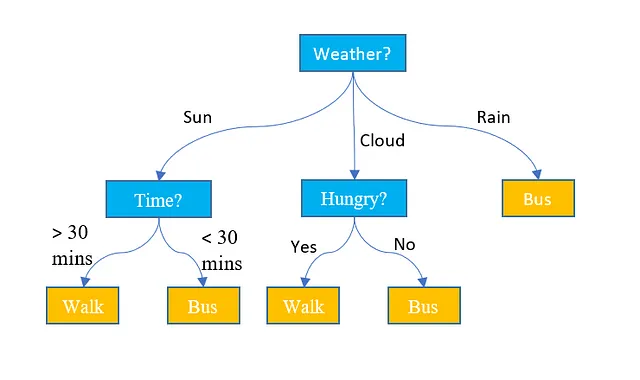



This is a good representation of how a decision tree can be used for a classification problem. There are two outcome classes in the diagram above — “Walk” and “Bus” and as you can see, whichever path you take, you will land on either of the two classes. Each edge represents the outcome of the question for example, the “Weather?” node has three different edges (namely Sun, Cloud, Rain) which each state the value of the Weather attribute for that particular instance.e.

## ***Key Terminologies:***

- ***Root Node***: The top node of a decision tree, from which all branches originate. It represents the entire dataset and is the starting point for making decisions.

- ***Internal Node:*** Nodes within the decision tree, other than the root and leaf nodes. Internal nodes represent decision points where the data is split into subsets based on the values of a specific feature.

- ***Leaf Node (Terminal Node):*** The end nodes of a decision tree, where no further splitting occurs. Leaf nodes provide the final predictions or classifications for the subsets of data that have reached them.

- ***Branch:*** A branch is a path from the root node to a leaf node, passing through internal nodes. It represents a sequence of decisions made based on feature values.

- ***Feature (Attribute):*** Features are the characteristics or attributes of the data that are used to make decisions at each internal node of the tree. Features are the variables that the tree algorithm assesses to create splits in the data.

- ***Split:*** A split occurs at an internal node and separates the data into two or more subsets based on the values of a specific feature. The decision tree algorithm determines the best way to split the data to maximize predictive accuracy.

- ***Criterion*** The criterion is a measure used to evaluate the quality of a split. In classification, common criteria include Gini impurity, entropy, and information gain. In regression, mean squared error and mean absolute error are often used as criteria.

- ***Impurity:*** Impurity measures the disorder or uncertainty within a subset of data. It’s used in classification to evaluate how well a particular split separates different classes. Lower impurity indicates a more pure subset.
       - ***Entropy:***  Entropy is a measure of impurity in information theory. It’s used to quantify the randomness or disorder in a set of class labels within a subset of data.
       - ***Gini Impurity:*** Gini impurity is another measure of impurity used in classification. It calculates the probability of misclassifying a randomly chosen element from the set. Lower Gini impurity indicates a purer subset.

- ***Information Gain:*** Information gain measures the reduction in impurity achieved by a particular split. It’s used to determine the best feature to split on, aiming to maximize the reduction in impurity.

- ***Pruning:*** Pruning is a technique used to reduce the size of a decision tree by removing branches that do not contribute significantly to predictive accuracy. It helps prevent overfitting.

- ***Maximum Depth:*** Maximum depth is a hyperparameter that limits the depth of the decision tree. It prevents the tree from becoming too deep, which can lead to overfitting.

- ***Node Purity:*** Node purity refers to how homogeneous or impure the data is at a particular node. For classification, purity means that all samples at a node belong to the same class. For regression, it relates to the similarity of target values.

### ***Intuition to create a decision tree***

1. Start with an empty tree
2. Select a feature to split the data at.
3. For each split :
    - If no further splitting, make predictions (based on majority class).
     - Otherwise, recursively go to step 2.


Now, how exactly do we know if there isn’t to be any further splitting? There are some conditions for stopping partition such as :

- All samples for given node belong to same class
- No remaining attributes
- No samples left
- Depth limit of tree reached
- One very important term that we just came across is splitting. Unless your decision tree model correctly identifies which attribute to split at, it might not be highly accurate. So, how do we know which attributes to split?

***

 # <span style='color:Green'>  ***Creating a Decision Tree Classification Model*** </span>


In [26]:
# The ‘criterion’ hyperparameter here is the feature split selection methods
# We can either calculate the splitting using Information Gain by setting the
# hyperparameter equal to ‘entropy’ or using the Gini index method by setting the hyperparameter equal to ‘gini’.

DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
y_preds_DT = DTC.predict(X_test)


### ***Calculating Accuracy Score Using Decision Tree Classification Model***

In [29]:

accuracy_score(y_test, y_preds_DT)


0.8026315789473685

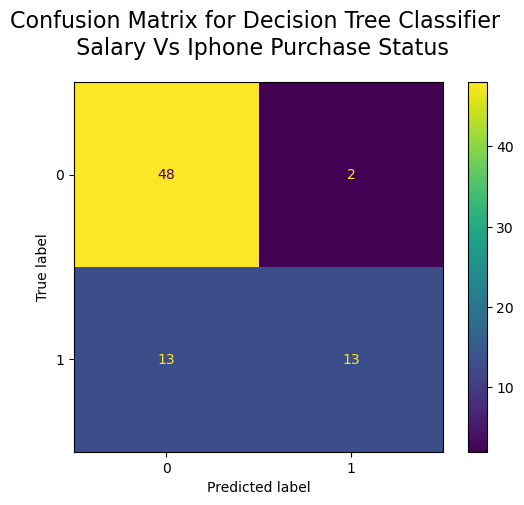

In [30]:

y_preds_DT = DTC.predict(X_test)

cm = confusion_matrix(y_test, y_preds_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier \n Salary Vs Iphone Purchase Status',pad=20,fontsize=16)
plt.show()


### ***Insights from Confusion Matric of Decision Tree Classifier***
- True Positives (TP) -> top-left (48): This represents the number of instances where the model correctly predicted the positive class (i.e., correctly predicted an iPhone purchase).

- True Negatives (TN)-> Bottom-Right (13): This represents the number of instances where the model correctly predicted the negative class (i.e., correctly predicted no iPhone purchase).

- False Positives (FP)-> Top-right (2): This represents the number of instances where the model incorrectly predicted the positive class (i.e., predicted an iPhone purchase when there was none).

- False Negatives (FN)->Bottom-left (13): This represents the number of instances where the model incorrectly predicted the negative class (i.e., predicted no iPhone purchase when there actually was one).

### ***Accuracy:***
The model correctly classified 61 out of 76 instances (48 TP + 13 TN), giving an accuracy of 61/76 ≈ 0.80 OR 80%.


***

***

***

# <span style='color:Red'>  ***4. Random Forest*** </span>
 
- Random Forest is a machine learning algorithm that belongs to the ensemble learning category, constructed upon the foundation of decision trees. Ensemble learning involves combining the predictions of multiple models to improve overall performance and robustness. Random Forest is particularly powerful for both classification and regression tasks.
  
- In the Random Forest technique, individual instances are carefully considered, and each decision tree casts its vote on the classification of the input data. The final prediction is determined by selecting the classification that receives the majority of votes from the ensemble of decision trees.

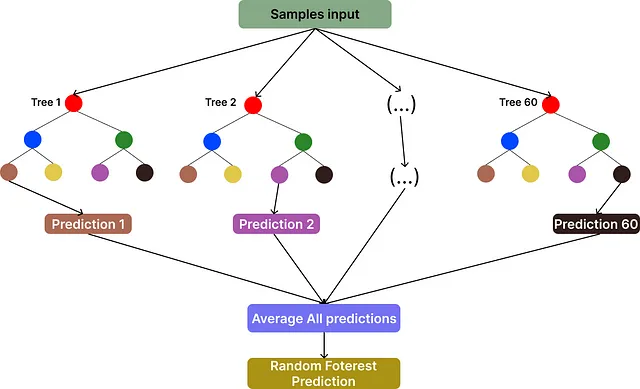

### ***How Does a Random Forest Work?***

1. ***Bootstrap Sampling:*** Instead of training each decision tree on the entire dataset, a Random Forest draws smaller samples of data with replacement (meaning a data point can be selected multiple times). This creates diversity among the trees.

2. ***Random Feature Selection:*** At each step where a decision tree considers splitting the data, only a random subset of the available features is considered. This prevents a few strong features from dominating every tree.

3. ***Building the Forest:*** Many decision trees are trained independently using the techniques above.

4. ***Making Predictions:*** For new data, each tree in the forest makes a prediction. The Random Forest’s final output is the most common prediction (classification) or the average (regression) of all the individual tree predictions.

***

 # <span style='color:Green'>  ***Creating Random Forest Classification Model*** </span>



In [31]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
y_preds_RFC = RFC.predict(X_test)


### ***Calculating Accuracy Score Using Random Forest Classification Model***

In [34]:

accuracy_score(y_test, y_preds_RFC)


0.7631578947368421

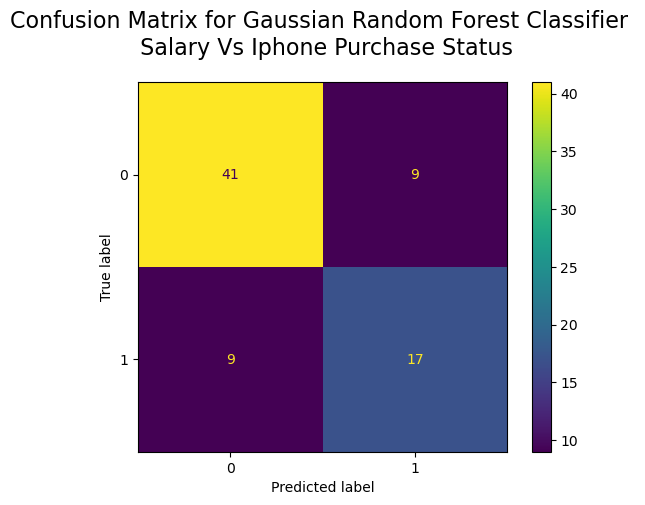

In [35]:

y_preds_RFC = RFC.predict(X_test)

cm = confusion_matrix(y_test, y_preds_RFC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Gaussian Random Forest Classifier \n Salary Vs Iphone Purchase Status',pad=20,fontsize=16)
plt.show()


### ***Insights from Confusion Matric of Random Forest Classifier***
- True Positives (TP) -> top-left (41): This represents the number of instances where the model correctly predicted the positive class (i.e., correctly predicted an iPhone purchase).

- True Negatives (TN)-> Bottom-Right (17): This represents the number of instances where the model correctly predicted the negative class (i.e., correctly predicted no iPhone purchase).

- False Positives (FP)-> Top-right (9): This represents the number of instances where the model incorrectly predicted the positive class (i.e., predicted an iPhone purchase when there was none).

- False Negatives (FN)->Bottom-left (9): This represents the number of instances where the model incorrectly predicted the negative class (i.e., predicted no iPhone purchase when there actually was one).

### ***Accuracy:***
The model correctly classified 58 out of 76 instances (41 TP + 17 TN), giving an accuracy of 58/76 ≈ 0.76 OR 76%.



***

***

***

 # <span style='color:Red'>  ***5. Gradient Boosting*** </span>
- Gradient boosting classifier is a set of machine learning algorithms that include several weaker models to combine them into a strong big one with highly predictive output. Models of a kind are popular due to their ability to classify datasets effectively.
- The key idea in gradient boosting is that each new model added to the ensemble focuses on correcting the mistakes made by the previous models. By iteratively minimizing the residuals and improving the predictions, the ensemble gradually increases its accuracy.

  
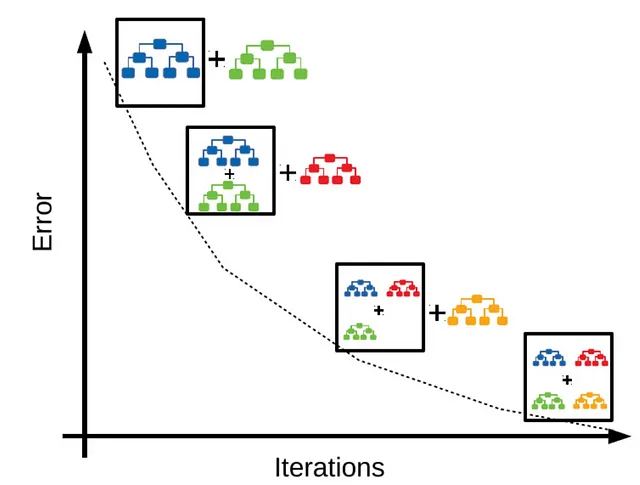


### ***Intuition***
Gradient Boosting relies on the intuition that the best possible next model , when combined with the previous models, minimizes the overall prediction errors. The key idea is to set the target outcomes from the previous models to the next model in order to minimize the errors. This is another boosting algorithm(few others are Adaboost, XGBoost etc.)

ion..

### ***Input requirement for Gradient Boosting***
1. ***A Loss Function to optimize***: The loss function basically tells how my algorithm, models the data set.In simple terms it is difference between actual values and predicted values.


2. ***A weak learner to make prediction(Generally Decision tree)***
Weak learners are the models which is used sequentially to reduce the error generated from the previous models and to return a strong model on the end.
Decision trees are used as weak learner in gradient boosting algorithm
   
3. ***An additive model to add weak learners to minimize the loss function***
In gradient boosting, decision trees are added one at a time (in sequence), and existing trees in the model are not changed.


### ***Gradient Boosting Algorithm***
1. It will start with training a base model(usually a decision tree). This model gives predictions for the entire dataset.
2. After making predictions, using the original values, it calculates the errors. These errors can be thought of as the parts of y that are still unexplained by the base model.
3. Before applying the next sequenced model, the algorithm applies the gradient descent method to calculate the optimized parameters of the next model.
4. Train a new model, and This model is fitted to minimize the difference between the predicted residuals and the actual residuals.
5. After training a new model, this algorithm calculates the new residuals by subtracting the updated predictions from the actual values of y. These residuals represent the remaining unexplained variability in the target variable.
6. This whole process gets repeated iteratively, adding the new models to the ensemble while applying gradient descent on it and updating the predictions and residuals.
7. At the final stage, the method combines the predictions from all the models where we consider the final predictions refined estimation of y.

***

 # <span style='color:Green'>  ***Creating Gradient Boosting Classification Model*** </span>


In [36]:
GBC = GradientBoostingClassifier(n_estimators=100, random_state=42)
GBC.fit(X_train,y_train)


GradientBoostingClassifier(random_state=42)

In [37]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### ***Calculating Accuracy Score Using Gradient Classification Model***

In [38]:
y_preds_GBC = GBC.predict(X_test)
accuracy_score(y_test, y_preds_GBC)


0.7894736842105263

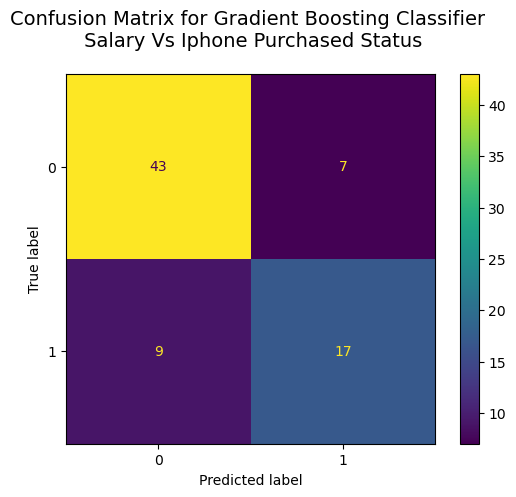

In [39]:
cm = confusion_matrix(y_test, y_preds_GBC)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Gradient Boosting Classifier \n Salary Vs Iphone Purchased Status',pad=20,fontsize=14)
plt.show()


### ***Insights from Confusion Matric of Boosting Classifier***
- True Positives (TP) -> top-left (43): This represents the number of instances where the model correctly predicted the positive class (i.e., correctly predicted an iPhone purchase).

- True Negatives (TN)-> Bottom-Right (17): This represents the number of instances where the model correctly predicted the negative class (i.e., correctly predicted no iPhone purchase).

- False Positives (FP)-> Top-right (7): This represents the number of instances where the model incorrectly predicted the positive class (i.e., predicted an iPhone purchase when there was none).

- False Negatives (FN)->Bottom-left (9): This represents the number of instances where the model incorrectly predicted the negative class (i.e., predicted no iPhone purchase when there actually was one).

### ***Accuracy:***
The model correctly classified 60 out of 76 instances (43 TP + 17 TN), giving an accuracy of 60/76 ≈ 0.79 OR 79%.
The model performs fairly well with an overall accuracy of 79%.



***

***

***

 # <span style='color:Red'>  ***6. Naive Bayes*** </span>
Naive bayes is a probability based machine learning algorithm which is based on bayes theorem. The Niave Bayes classifier is a common supervised machine leaning algorithm popularly used for text classification,natural language processing, spam filtering, document classification and sentiment analysis.
In every algorithm we make some assumptions like in KNN we assume that the neighborhood datapoints belong to the same class. Likewise in Naive Bayes we assume that features are conditionally independent. That is the occurrence of one feature does not affect the occurrence of another feature




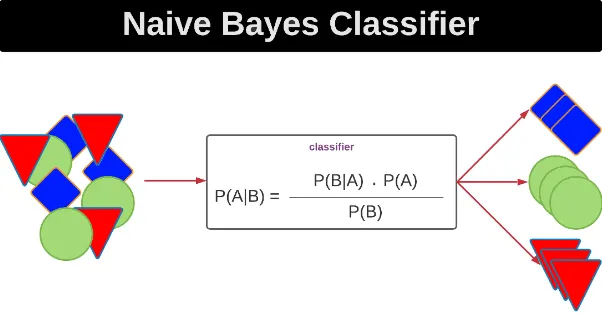



vidence..


Where,

- ***P(A|B) is Posterior probability:*** Probability of hypothesis A on the observed event B.

- ***P(B|A) is Likelihood probability:*** Probability of the evidence given that the probability of a hypothesis is true.

- ***P(A) is Prior Probability:*** Probability of hypothesis before observing the evidence.

- ***P(B) is Marginal Probability:*** Probability of Evidence.

***

### ***How Does It Use Bayes’ Theorem?***
Acc to Bayes’ theorem, we adjust our initial belief (hypothesis) based on new information (evidence). In the world of Naive Bayes:

- The hypothesis is the class or category we’re trying to predict. For example, “This email is spam.”
- The evidence consists of the features of our data. In the email example, this might be the words in the email.
Using Bayes’ theorem, the classifier calculates the probability of each class given the provided features. It then predicts the class with the highest probability.

***

## ***Naive Bayes Algorithm***
- Naive Bayes is basically an algorithm that solves classification problems using Bayes theorem.
- It uses a probability-based approach to classify data points between certain classes. The algorithm is based on an important assumption, called “naive” or “pure”: the idea that all features are independent of each other. While this assumption may not exactly fit the real-life dataset in practice, it yields good results in practice.

- The working principle of Naive Bayes is quite simple. For a given input data point, the probability for each class is calculated and the class with the highest probability is selected. This includes the probability distributions used to model how the features are distributed in the given class.

***

## ***Types of Naive Bayes***
The Naive Bayes algorithm can be adapted in different types according to the data set. The three most common types are:

- ***Bernoulli Naive Bayes***: Used to work with binary data and represents the non-existence of features.

- ***Multinomial Naive Bayes:***  Used in problems with multiple categories, such as text classification, and represents the number of features.

- ***Gaussian Naive Bayes:*** Used for working with continuous data and assumes that the features have a normal distribution.



  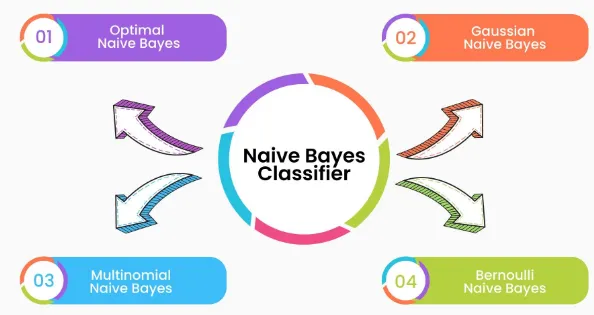

***

## ***Applications of Naive Bayes***
Naive Bayes is a popular algorithm for a variety of real-world classification tasks, including:

- ***Email spam classification:*** Naive Bayes can be used to filter spam emails from your inbox.
- ***Sentiment analysis***: Naive Bayes can be used to determine the sentiment of a piece of text (e.g., positive, negative, or neutral).
- ***Text classification:*** Naive Bayes can be used to classify text documents into different categories (e.g., news articles, blog posts, etc.).
- ***Image classification:*** Naive Bayes can be used to classify images into different categories (e.g., cats, dogs, cars, etc.).
- ***Fraud detection:*** Naive Bayes can be used to detect fraudulent transactions.
- ***Medical diagnosis:*** Naive Bayes can be used to help doctors diagnose diseases.

***

 # <span style='color:Green'>  ***Creating a Naive Bayes Classification Model*** </span>


In [40]:
# Since age and salary are both continuous variables,therefore using Gaussian Naive Bayes.
# Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
y_pred_gnb = gnb.predict(X_test)

### ***Calculating Accuracy Score Using Naive Bayes Classification Model***

In [43]:
accuracy = accuracy_score(y_test, y_pred_gnb)
print("Naive Bay Accuracy Rate:", accuracy)

Naive Bay Accuracy Rate: 0.8026315789473685


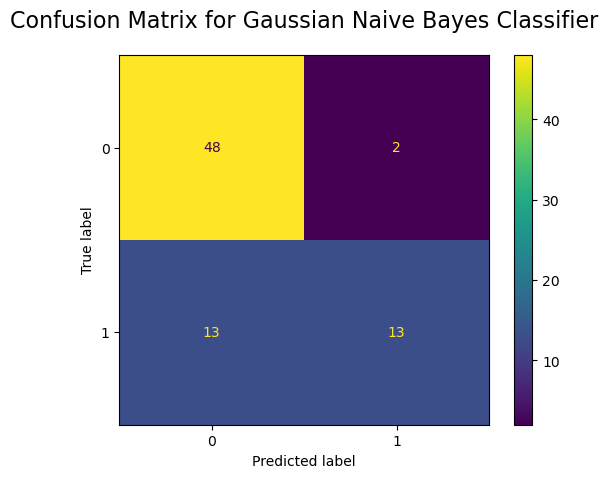

In [44]:

# Predict on the test set
y_preds_gnb = gnb.predict(X_test)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_preds_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier',pad=20,fontsize=16)
plt.show()


### ***Insights from Confusion Matric of Gaussian Naive Bayes Classifier***
- True Positives (TP) -> top-left (48): This represents the number of instances where the model correctly predicted the positive class (i.e., correctly predicted an iPhone purchase).

- True Negatives (TN)-> Bottom-Right (13): This represents the number of instances where the model correctly predicted the negative class (i.e., correctly predicted no iPhone purchase).
  
- False Positives (FP)-> Top-right (2): This represents the number of instances where the model incorrectly predicted the positive class (i.e., predicted an iPhone purchase when there was none).

- False Negatives (FN)->Bottom-left (13): This represents the number of instances where the model incorrectly predicted the negative class (i.e., predicted no iPhone purchase when there actually was one).

### ***Accuracy:***
The model correctly classified 61 out of 76 instances (48 TP + 13 TN), giving an accuracy of 61/76 ≈ 0.80 OR 80%


***

***

***

 # <span style='color:Red'>  ***7. Logistic Regression*** </span>
Logistic Regression is a supervised learning algorithm that is used when the target variable is categorical.It accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.

For example, 0 – represents a negative class; 1 – represents a positive class. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1)



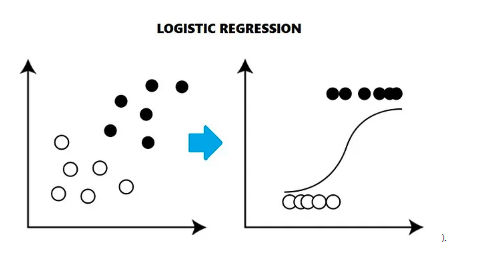

### ***Types of Logistic Regression***

1. **Binary Logistic Regression**:
The dependent variable has only two 2 possible outcomes/classes.
Example-Male or Female.

2. **Multinomial Logistic Regression**:
The dependent variable has only two 3 or more possible outcomes/classes without ordering.
Example: Predicting food quality.(Good,Great and Bad).

3. **Ordinal Logistic Regression**:
The dependent variable has only two 3 or more possible outcomes/classes with ordering. Example: Star rating from 1 to 5

### ***Examples Of Logistic Regression***

Some examples of such classifications and instances where the binary response is expected or implied are:

1. Determine the probability of heart attacks: With the help of a logistic model, medical practitioners can determine the relationship between variables such as the weight, exercise, etc., of an individual and use it to predict whether the person will suffer from a heart attack or any other medical complication.

2. Possibility of enrolling into a university: Application aggregators can determine the probability of a student getting accepted to a particular university or a degree course in a college by studying the relationship between the estimator variables, such as GRE, GMAT, or TOEFL scores.

3. Identifying spam emails: Email inboxes are filtered to determine if the email communication is promotional/spam by understanding the predictor variables and applying a logistic regression algorithm to check its authenticity.

### ***Why is it called regression if it is a classification algorithm?***
The term “regression” in logistic regression refers to the fact that the model is trying to predict the probability of a categorical outcome, such as whether or not someone will buy a product. This is in contrast to linear regression, which is used to predict a continuous outcome, such as the price of a product.

In logistic regression, the probability of the outcome is represented by a logistic function. The logistic function is a sigmoid curve that has a range of values from 0 to 1. This means that the predicted probability of the outcome can be any value between 0 and 1.

***

 # <span style='color:Green'>  ***Creating a Logistic Regression  Model*** </span>


In [45]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_pred_LR= LR.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred_LR)
accuracy

0.8026315789473685

In [48]:
# Predict on the test set
y_preds_LR = LR.predict(X_test)

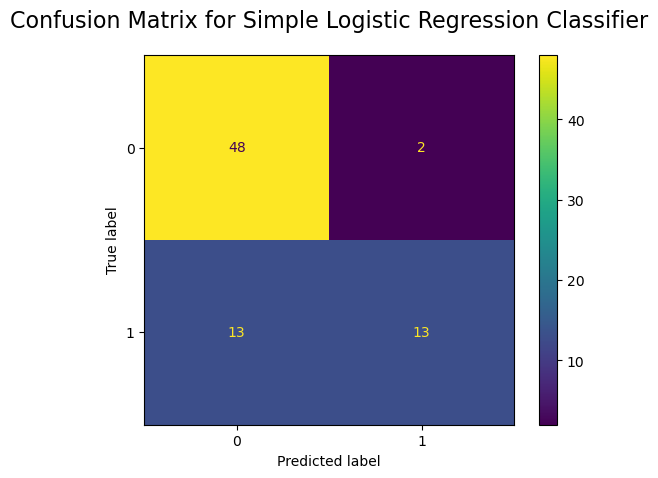

In [49]:
# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_preds_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Simple Logistic Regression Classifier',pad=20,fontsize=16)
plt.show()


### ***Insights from Confusion Matric of Logistic Regression  Classifier***
- True Positives (TP) -> top-left (48): This represents the number of instances where the model correctly predicted the positive class (i.e., correctly predicted an iPhone purchase).

- True Negatives (TN)-> Bottom-Right (13): This represents the number of instances where the model correctly predicted the negative class (i.e., correctly predicted no iPhone purchase).
  
- False Positives (FP)-> Top-right (2): This represents the number of instances where the model incorrectly predicted the positive class (i.e., predicted an iPhone purchase when there was none).

- False Negatives (FN)->Bottom-left (13): This represents the number of instances where the model incorrectly predicted the negative class (i.e., predicted no iPhone purchase when there actually was one).

### ***Accuracy:***
The model correctly classified 61 out of 76 instances (48 TP + 13 TN), giving an accuracy of 61/76 ≈ 0.80 OR 80%


***

 # <span style='color:Red'>  ***Comparing Accuracy Scores of Classifiers*** </span>


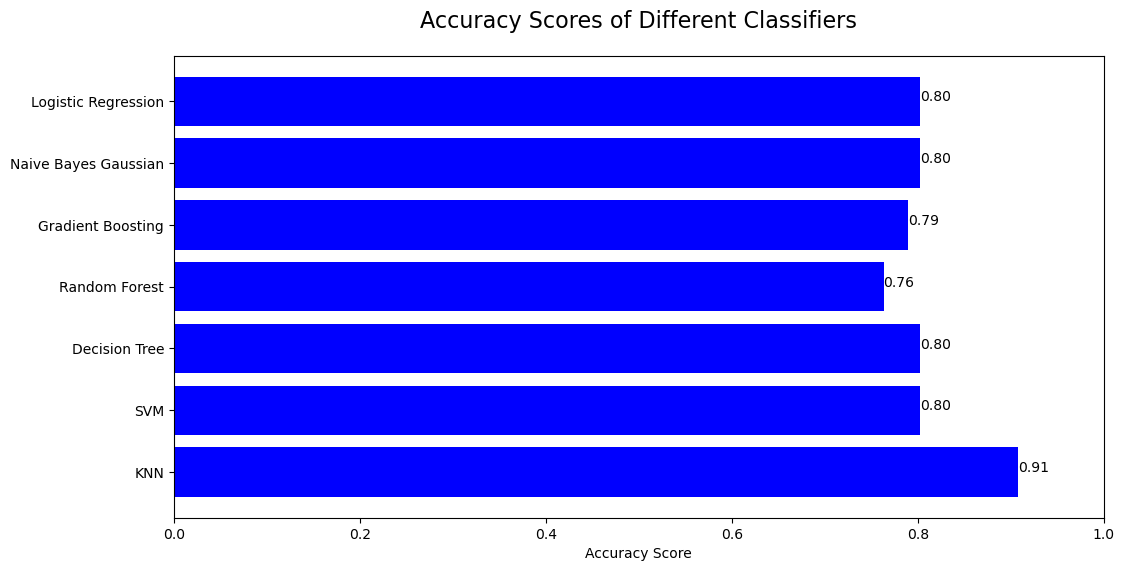

In [50]:
classifiers = [
    'KNN',
    'SVM',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'Naive Bayes Gaussian',
    'Logistic Regression'
]

accuracy_scores = [
    0.9078947368421053,
    0.8026315789473685,
    0.8026315789473685,
    0.7631578947368421,
    0.7894736842105263,
    0.8026315789473685,
    0.8026315789473685
]

# Creating the bar graph
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracy_scores, color='blue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers',pad=20,fontsize=16)
plt.xlim(0, 1) 

for index, value in enumerate(accuracy_scores):
    plt.text(value, index, f'{value:.2f}')

plt.show()


***